# Problem statement
On this notebook we are about to compair the performance of two defferent clustring algorithms, the **DBSCAN** and the **Hierarchical** clustering methods. First, we're going to select and load a dataset. After that, both algorithms will be applied to the dataset the results will be represented.

For the last stage, we introduce three performance measure for the clustering algorithms and comair them via this performance metrics.

# First stage, Loading the database
For the dataset, we choose Wholesale customers dataset available in [here](https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter01/Data/Wholesale%20customers%20data.csv). This databse is about the customers of a super market. We first load the database and then normalize the values of the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
%matplotlib inline

In [5]:
dataset = pd.read_csv('wholesale-customers-data.csv')
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Now we normalize the data points values

In [8]:
data_scaled = normalize(dataset)
data_scaled = pd.DataFrame(data_scaled, columns=dataset.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


# Second stage, Running clustering algorithms 
## DBSCAN

Estimated number of clusters: 2
Estimated number of noise points: 127


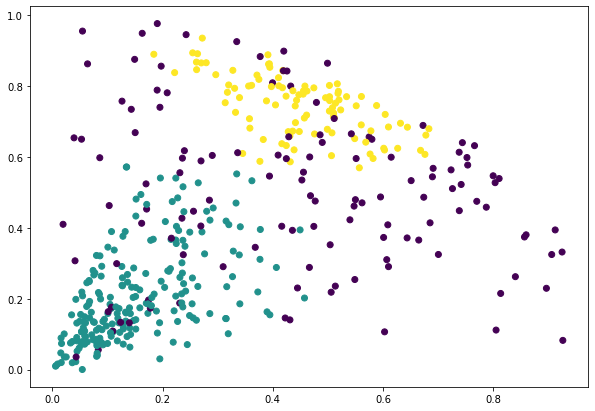

In [75]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Compute DBSCAN
db = DBSCAN(eps=0.2, min_samples=20).fit(data_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dbscan_labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=dbscan_labels) 

## Hierarchical

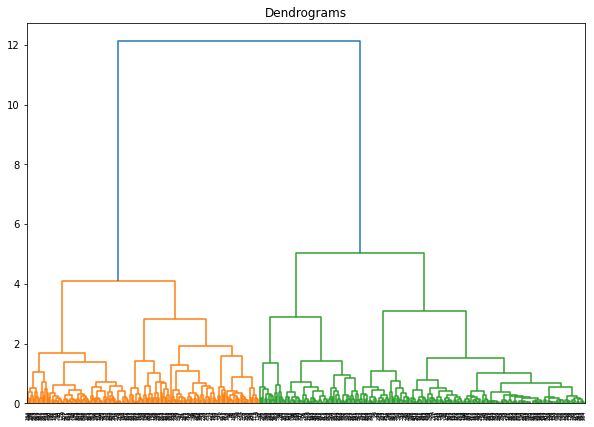

In [62]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

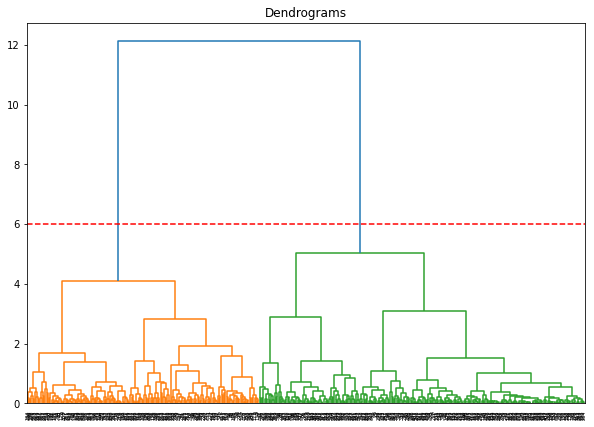

In [63]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [64]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
h_labels = cluster.fit_predict(data_scaled)

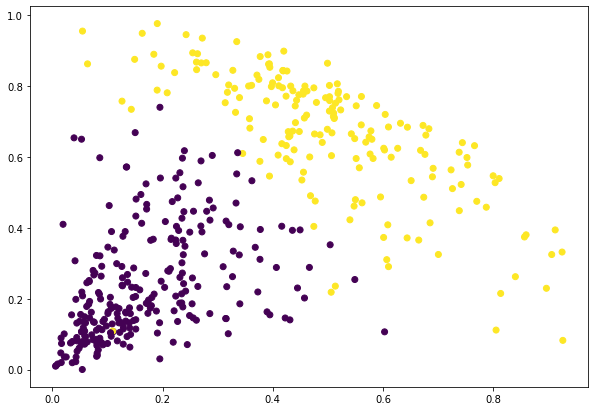

In [65]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=h_labels) 

# Last stage, performance metrics
For supervised learning problems such as a linear regression model that predicts house prices, there is a target that you are trying to predict for. From this target you can infer some form of accuracy by using metrics such as RMSE, MAPE, MAE etc. However, when implementing a clustering algorithm for a dataset with no such target to aim for, an ‘accuracy’ score is not possible. We therefore need to look for other types of measurement that give us an indication of performance. The most common is the distinctness or uniqueness of the clusters created, after all if all clusters look the same then you haven't achieved your goal of creating clusters with unique characteristics. To measure the distinctness of clusters there are 3 common metrics to use, these are:

1. Silhouette Coefficient
2. Calinski-Harabaz Index
3. Davies-Bouldin Index

## 1. Silhouette Coefficient:

This score is between -1 and 1, where the higher the score the more well defined and distinct your clusters are. It can be calculated using scikit-learn in the following way:

In [78]:
from sklearn.metrics import silhouette_score

h_score = silhouette_score(data_scaled, h_labels)
dbscan_score = silhouette_score(data_scaled, dbscan_labels)

print (f'Hierarchical score: {h_score}')
print (f'DBSCAN score: {dbscan_score}')

Hierarchical score: 0.49090467744510174
DBSCAN score: 0.36403708910389276


## 2. Calinski-Harabaz Index
Like the Silhouette Coefficient, the higher the score the more well defined the clusters are. This score has no bound, meaning that there is no ‘acceptable’ or ‘good’ value and must be tracked throughout the development of your model to see if it improves or not. It can be calculated using scikit-learn in the following way:

In [77]:
from sklearn.metrics import calinski_harabasz_score

h_score = calinski_harabasz_score(data_scaled, h_labels)
dbscan_score = calinski_harabasz_score(data_scaled, dbscan_labels)

print (f'Hierarchical score: {h_score}')
print (f'DBSCAN score: {dbscan_score}')

Hierarchical score: 534.9915351856686
DBSCAN score: 307.58771126937006


## 3. Davies-Bouldin Index
Unlike the previous two metrics, this score measures the similarity of your clusters, meaning that the lower the score the better separation there is between your clusters. It can be calculated using scikit-learn in the following way:

In [76]:
from sklearn.metrics import davies_bouldin_score

h_score = davies_bouldin_score(data_scaled, h_labels)
dbscan_score = davies_bouldin_score(data_scaled, dbscan_labels)

print (f'Hierarchical score: {h_score}')
print (f'DBSCAN score: {dbscan_score}')

Hierarchical score: 0.8166647229022314
DBSCAN score: 1.5154708864011768


## Which performance metric should we choose for our clustering algorithm?
The most commonly used metric for measuring performance of a clustering algorithm is the Silhouette Coefficient. This is likely due to it's bound from -1 to 1, making it possible to easily understand the performance and compare against models from different datasets.